In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Part (A) Product affinity based segmentation


### 1. Compute and report the characteristics of the affinity based segment for Product 3 (our candidate as given above). Report the characteristics in terms of the following descriptors: IPr, Iin, ICp, ICl, Icn, IBr, pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC, and the demographics income, age, sports and gradschl. For this you need to compute the weighted average of all the columns in the "for-cluster-analysis" worksheet, weighted by the probabilities given in column BF of the "mugs-full" worksheet.  You should not do this in Excel directly. You are  to load the data into python or R and compute the weighted averages in R or python; this is to help you build familiarity with these languages and prepare you better for your job. 

In [34]:
df = pd.read_excel('mugs-dataset-for-segmentation-exercise.xlsx')
pd.set_option('display.max_columns', None)

In [35]:
prob = df.iloc[:, -3:]
descr = df.iloc[:, 1:-3]

In [36]:
wt_avg = []
for p_i in prob.columns:
    deno_i = prob[p_i].sum()
    
    for descr_i in descr.columns:
        wt_avg_i = sum(descr[descr_i] * prob[p_i]) / deno_i
        wt_avg.append(wt_avg_i)
        
wt_avg_array = np.array(wt_avg).reshape((3, 28))
wt_df = pd.DataFrame(wt_avg_array)

wt_df.columns = descr.columns
wt_df.index = ['prod1', 'prod2', 'prod3']

wt_df.iloc[[2]]

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
prod3,1.0,5.01549,7.0,1.0,3.914327,7.0,3.096495,5.32783,3.879569,1.0,4.870364,7.0,1.0,3.780847,7.0,3.891631,3.608785,4.463553,25.957759,11.139006,12.199318,21.128709,16.648585,12.966526,57.743197,46.473295,0.448284,0.448373


### 2. Repeat the step above for the product of brand A and the product for brand B. Compute also the overall mean for each descriptor (this done by a simple average of each descriptor across all 311 customers). Compute the log-lifts for all variables for the affinity based segment for each product and focus on the large positive and negative numbers to figure out how each segment is different from the other segments and the overall population average. (You will use these in the next step to come up with a verbal description that characterizes each segment.) 

In [37]:
wt_df.iloc[0:2]

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
prod1,1.0,4.919876,7.0,1.0,4.020961,7.0,3.266504,5.366698,3.789076,1.0,4.868985,7.0,1.0,3.850350,7.0,5.429532,3.500791,3.040357,18.047792,13.356015,16.360400,18.474953,20.656958,13.116932,60.166276,46.711154,0.470745,0.359619
prod2,1.0,5.666979,7.0,1.0,4.133281,7.0,3.108512,5.337524,3.970306,1.0,5.037719,7.0,1.0,4.127197,7.0,2.896781,4.608242,4.403476,38.982200,8.963664,12.163142,14.565828,12.400454,12.891389,49.635778,42.849522,0.168137,0.247890


In [38]:
descr_mean = descr.mean().to_frame().T
descr_mean.index = ['mean']

wt_mean_df = pd.concat([wt_df, descr_mean], axis=0)
wt_mean_df

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
prod1,1.0,4.919876,7.0,1.0,4.020961,7.0,3.266504,5.366698,3.789076,1.0,4.868985,7.0,1.0,3.850350,7.0,5.429532,3.500791,3.040357,18.047792,13.356015,16.360400,18.474953,20.656958,13.116932,60.166276,46.711154,0.470745,0.359619
prod2,1.0,5.666979,7.0,1.0,4.133281,7.0,3.108512,5.337524,3.970306,1.0,5.037719,7.0,1.0,4.127197,7.0,2.896781,4.608242,4.403476,38.982200,8.963664,12.163142,14.565828,12.400454,12.891389,49.635778,42.849522,0.168137,0.247890
prod3,1.0,5.015490,7.0,1.0,3.914327,7.0,3.096495,5.327830,3.879569,1.0,4.870364,7.0,1.0,3.780847,7.0,3.891631,3.608785,4.463553,25.957759,11.139006,12.199318,21.128709,16.648585,12.966526,57.743197,46.473295,0.448284,0.448373
mean,1.0,5.266881,7.0,1.0,4.041801,7.0,3.154341,5.344051,3.890675,1.0,4.942122,7.0,1.0,3.951768,7.0,3.938907,4.006431,3.996785,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,54.996785,44.983923,0.334405,0.334405


In [39]:
log_lift = np.log10(wt_mean_df.iloc[:3, -28:] / wt_mean_df.iloc[3, -28:])
log_lift

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
prod1,2.892982e-16,-0.029599,1.928655e-16,2.892982e-16,-0.002245,1.928655e-16,0.015175,0.001837,-0.011492,2.892982e-16,-0.006475,1.928655e-16,2.892982e-16,-0.011291,1.928655e-16,0.139387,-0.058591,-0.118786,-0.207848,0.088750,0.084340,0.024144,0.109378,0.004534,0.039016,0.016363,0.148513,0.031570
prod2,0.000000e+00,0.031798,1.928655e-16,0.000000e+00,0.009720,1.928655e-16,-0.006356,-0.000531,0.008799,0.000000e+00,0.008320,1.928655e-16,0.000000e+00,0.018864,1.928655e-16,-0.133460,0.060778,0.042085,0.126594,-0.084441,-0.044408,-0.079104,-0.112251,-0.002999,-0.044542,-0.021111,-0.298609,-0.130014
prod3,-1.446491e-16,-0.021240,3.857310e-16,-1.446491e-16,-0.013918,3.857310e-16,-0.008038,-0.001320,-0.001241,-1.446491e-16,-0.006352,3.857310e-16,-1.446491e-16,-0.019202,3.857310e-16,-0.005244,-0.045397,0.047970,-0.050005,0.009920,-0.043118,0.082434,0.015689,-0.000475,0.021164,0.014146,0.127280,0.127366


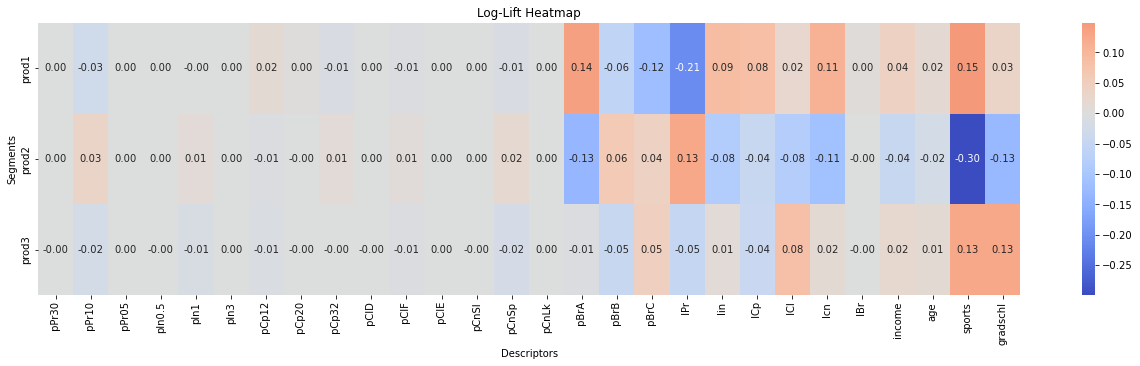

In [40]:
log_lift = log_lift.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(22, 5))

sns.heatmap(log_lift, cmap='coolwarm', center=0, annot=True, fmt='.2f')

plt.title('Log-Lift Heatmap')
plt.xlabel('Descriptors')
plt.ylabel('Segments')

plt.show()

Compare to the overall population average,

Segment 1: 
- Noteworthy (greater than 0.04): lower pBrB (-0.06), higher income (0.04)
- Very noteworthy (greater than 0.08): higher pBrA (0.14), lower pBrC (-0.12), lower price importance (-0.21), higher insulated time (0.09), higher capacity (0.08), higher containment (0.11), higher sports activeness (0.15)

Segment 2: 
- Noteworthy: lower capacity (-0.04), higher pBrB (0.06), higher pBrC (0.04), lower income (-0.04)
- Very noteworthy: lower pBrA (-0.13), higher price importance (0.13), lower insulated time (-0.08), lower cleanability (-0.08), lower containment (-0.11), lower sports activeness (-0.30), lower education level (-0.13)

Segment 3: 
- Noteworthy: lower pBrB (-0.05), higher pBrC (0.05), lower price importance (-0.05), lower capacity (-0.04)
- Very noteworthy: higher cleanability (0.08), higher sports activeness (0.13), higher education level (0.13)


Segment 1 has low price importance, high insulated time, high capacity, and high containment compared to the other segments.

Segment 2 has high price importance, low insulated time, low cleanability, low containment, low sports activeness, and low education level compared to the other segments.

Segment 3 has high cleanability and high education level compared to the other segments.

### 3. Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager, not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available. The suggested length for the persona description for each segment is 2-5 sentences. 

Segment 1: Mark embodies the essence of an Efficiency Enthusiast, his days filled with vigorous activity and constant movement. Whether he's sprinting on the track or hiking through the wilderness, Mark relies on gear that matches his high-energy lifestyle. His preference for products with high capacity and superior insulation stems from a need for durability and practicality. Functionality reigns supreme in his selection process, with every item meticulously chosen to meet his standards of performance and efficiency.

Segment 2: Emily identifies strongly with the ethos of the Budget-Conscious Minimalists, valuing simplicity and affordability above all else. While she may not engage in intense sports activities, Emily still seeks products that offer utility without breaking the bank. Her approach to purchases is straightforward, prioritizing practicality and ease of use over unnecessary features. With a focus on items with lower capacities and minimal insulation, Emily ensures that every purchase aligns with her commitment to functionality and budget-consciousness.

Segment 3: Sophia epitomizes the essence of the Quality-Conscious Sophisticates, her lifestyle characterized by elegance and refinement. With a keen eye for cleanliness and hygiene, Sophia invests in products that offer both sophistication and practicality. Her higher education level has cultivated an appreciation for the finer details in design and functionality. From her chic, easy-to-maintain water bottle to her stylish lunch container, every item in Sophia's collection reflects her discerning taste and commitment to quality. Her active lifestyle demands products that not only elevate her experience but also align with her values of cleanliness and sophistication.

# Part (B) Classical segmentation

## Run a kmeans cluster analysis using the following variables as the segmentations basis variables: IPr, Iin, ICp, ICl, Icn, IBr, pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC. 
## Decide the best value of "k".

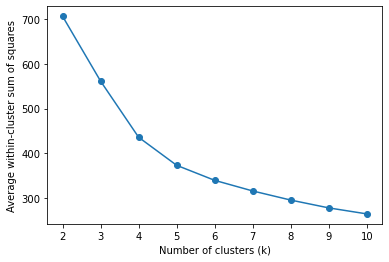

In [41]:
X = df.iloc[:, 1:-4].values

within_cluster_mean_sum_of_squares = []

np.random.seed(410014)

for k in range(2, 11):
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(X)
    # compute average within-cluster sum of squares
    ave_within_cluster_mean_sum_of_squares = (kmeansModel.inertia_) / X.shape[0]
    within_cluster_mean_sum_of_squares.append(ave_within_cluster_mean_sum_of_squares)

# plot the results
plt.plot(range(2, 11), within_cluster_mean_sum_of_squares, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average within-cluster sum of squares')
plt.show()

A value of k=5 appears optimal since raising k further doesn't notably reduce the average within-cluster sum of squares.

### 1. Compute and report the characteristics of all segments. Report the characteristics in terms of the average value, for each segment, of each of the following variables: IPr, Iin, ICp, ICl, ICn, IBr, pPr30, pPr10, pPr05, pIn0.5, pIn1, pIn3, pCp12, pCp20, pCp32, pClD, pClF, pClE, pCnSl, pCnSp, pCnLk, pBrA, pBrB, pBrC. Also, do profiling in terms of the demographics: income, age, sports and gradschl. "Profiling" means reporting the average value, for each segment, of each  descriptor that was excluded from the kmeans analysis's inputs. In this case, the excluded variables are:income, age, sports and gradschl. Finally, report the percentage of customers in each segment.

In [46]:
X = df.iloc[:, 1:25].values

np.random.seed(410014)

kmeansModel = KMeans(n_clusters=5, n_init=50, max_iter=100)
kmeansModel.fit(X)

df['Segment'] = kmeansModel.labels_

df_clustered = df.iloc[:,1:].groupby('Segment').mean()
df_clustered = df_clustered.iloc[:,:-3]
df_clustered

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.556338,7.0,1.0,4.049296,7.0,2.852113,5.169014,4.225352,1.0,4.859155,7.0,1.0,3.915493,7.0,2.640845,4.119718,5.176056,46.429577,7.964789,8.781690,12.591549,11.345070,12.887324,47.401408,42.225352,0.105634,0.288732
1,1.0,4.727273,7.0,1.0,4.606061,7.0,3.363636,4.787879,3.939394,1.0,4.515152,7.0,1.0,3.484848,7.0,4.939394,4.181818,2.636364,16.030303,29.575758,12.303030,14.363636,14.606061,12.969697,58.757576,45.212121,0.666667,0.363636
2,1.0,5.190476,7.0,1.0,3.976190,7.0,2.761905,5.428571,4.285714,1.0,4.952381,7.0,1.0,4.547619,7.0,6.000000,3.571429,2.547619,12.880952,8.571429,9.714286,12.238095,43.166667,13.571429,62.380952,46.857143,0.357143,0.285714
3,1.0,4.900000,7.0,1.0,4.075000,7.0,4.375000,6.000000,2.825000,1.0,5.150000,7.0,1.0,4.100000,7.0,5.800000,3.775000,2.375000,13.650000,9.450000,41.975000,10.975000,11.000000,12.850000,59.100000,44.825000,0.275000,0.025000
4,1.0,5.166667,7.0,1.0,3.703704,7.0,3.222222,5.592593,3.462963,1.0,5.259259,7.0,1.0,3.759259,7.0,3.759259,4.111111,4.055556,15.722222,10.018519,8.333333,41.111111,12.000000,12.870370,63.888889,50.759259,0.759259,0.703704


In [47]:
segment_cnt = df['Segment'].value_counts()

total_cust = len(df)

segment_perc = (segment_cnt / total_cust) * 100

print("Percentage of customers in each segment:")
print(segment_perc)

Percentage of customers in each segment:
0    45.659164
4    17.363344
2    13.504823
3    12.861736
1    10.610932
Name: Segment, dtype: float64


### 2. Compute the log-lifts for all variables for all segments and focus on the large positive and negative numbers  to figure out how each segment is different from the other segments and the overall population average. You will use these in the next step to come up with a verbal description that characterizes each segment.  The log lift for any variable "x" for any segment "s" is  Log( (unweighted average of "x" across all persons within segment "s")/(unweighted average of x across all persons regardless of segment)).

In [48]:
log_lift_clustered = pd.DataFrame(columns = wt_mean_df.columns)

for segment_i in range(5):
    log_lift_clustered_i = np.log10(df_clustered.loc[segment_i] / wt_mean_df.loc['mean'])
    log_lift_clustered_i.name = segment_i
    log_lift_clustered = log_lift_clustered.append(log_lift_clustered_i)

log_lift_clustered

/var/folders/cp/yvxc2mxs2bqgmwd6cm4_cwsc0000gn/T/ipykernel_83747/2045744578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_lift_clustered = log_lift_clustered.append(log_lift_clustered_i)
/var/folders/cp/yvxc2mxs2bqgmwd6cm4_cwsc0000gn/T/ipykernel_83747/2045744578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_lift_clustered = log_lift_clustered.append(log_lift_clustered_i)
/var/folders/cp/yvxc2mxs2bqgmwd6cm4_cwsc0000gn/T/ipykernel_83747/2045744578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log_lift_clustered = log_lift_clustered.append(log_lift_clustered_i)
/var/folders/cp/yvxc2mxs2bqgmwd6cm4_cwsc0000gn/T/ipykernel_83747/2045744578.py:6: FutureWarning: The frame.append method is deprecated and wil

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr,income,age,sports,gradschl
0,0.0,0.023235,0.0,0.0,0.000805,0.0,-0.043742,-0.014463,0.035838,0.0,-0.007353,0.0,0.0,-0.004005,0.0,-0.173633,0.01211,0.112288,0.202523,-0.135752,-0.185876,-0.14236,-0.150881,-0.003136,-0.064546,-0.027484,-0.50047,-0.063777
1,0.0,-0.046943,0.0,0.0,0.056755,0.0,0.0279,-0.047727,0.005404,0.0,-0.039241,0.0,0.0,-0.054608,0.0,0.098298,0.018607,-0.180705,-0.25933,0.434009,-0.039442,-0.085175,-0.041155,-0.000369,0.028727,0.002198,0.299636,0.036394
2,0.0,-0.006346,0.0,0.0,-0.007108,0.0,-0.0577,0.006815,0.041998,0.0,0.000901,0.0,0.0,0.060993,0.0,0.182776,-0.049916,-0.195576,-0.354324,-0.103873,-0.142043,-0.154725,0.42946,0.019327,0.054715,0.017718,0.028569,-0.068341
3,0.0,-0.031357,0.0,0.0,0.003553,0.0,0.142069,0.050281,-0.139007,0.0,0.017894,0.0,0.0,0.015992,0.0,0.168052,-0.025841,-0.226047,-0.329139,-0.061495,0.493537,-0.202035,-0.164295,-0.004395,0.03125,-0.001537,-0.08494,-1.126333
4,0.0,-0.008343,0.0,0.0,-0.037939,0.0,0.009247,0.019743,-0.050577,0.0,0.027011,0.0,0.0,-0.021689,0.0,-0.020273,0.011202,0.00634,-0.267758,-0.036123,-0.208635,0.37152,-0.126507,-0.003707,0.065088,0.052458,0.356117,0.323117


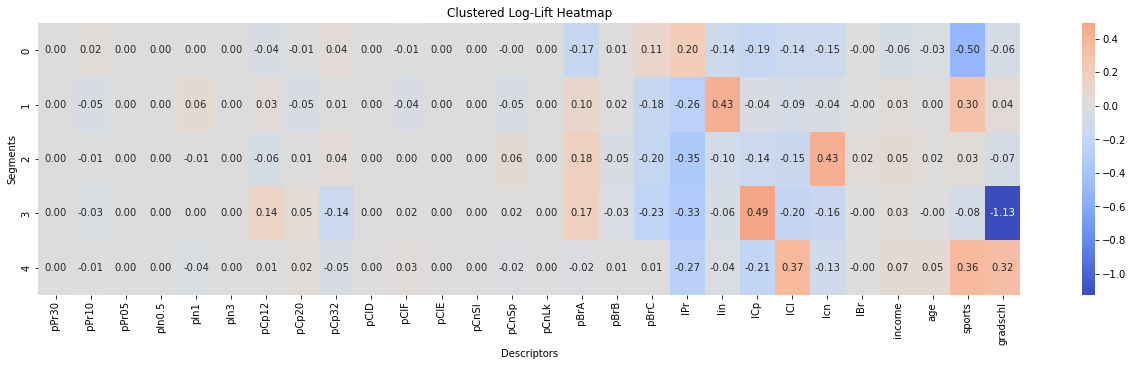

In [49]:
log_lift_clustered = log_lift_clustered.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(22, 5))

sns.heatmap(log_lift_clustered, cmap='coolwarm', center=0, annot=True, fmt='.2f')

plt.title('Clustered Log-Lift Heatmap')
plt.xlabel('Descriptors')
plt.ylabel('Segments')

plt.show()

Compare to the overall population average,

Segment 0: 
- Noteworthy: lower pCp12 (-0.04), higher pCp32 (0.04), lower income (-0.06), lower education level (-0.06)
- Very noteworthy: lower pBrA (-0.17), higher pBrC (0.11), higher price importance (0.20), lower insulated time (-0.14), lower capacity (-0.19), lower cleanability (-0.14), lower containment (-0.15), lower sports activeness (-0.50)

Segment 1: 
- Noteworthy: lower pPr10 (-0.05), higher pIn1 (0.06), lower pCp20 (-0.05), lower pCnSp (-0.05), higher pBrA (0.10), lower capacity (-0.04), lower cleanability (-0.09), lower containment (-0.04)
- Very noteworthy: lower pBrC (-0.18), lower price importance (-0.26), higher insulated time (0.43), higher sports activeness (0.30)

Segment 2: 
- Noteworthy: lower pCp12 (-0.06), higher pCp32 (0.04), higher pCnSp (0.06), lower pBrB (-0.05), higher income (0.05)
- Very noteworthy: higher pBrA (0.18), lower pBrC (-0.20), lower price importance (-0.35), lower insulated time (-0.10), lower capacity (-0.14), lower cleanability (-0.15), higher containment (0.43), lower education level (-0.07)

Segment 3: 
- Noteworthy (greater than 0.04): lower insulated time (-0.06), higher pCp20 (0.05)
- Very noteworthy (greater than 0.08): higher pCp12 (0.14), lower pCp32 (-0.14), higher pBrA (0.17), lower pBrC (-0.23), lower price importance (-0.33), higher capacity (0.49), lower cleanability (-0.20), lower containment (-0.16), lower sports activeness (-0.08), lower education level (-1.13)

Segment 4: 
- Noteworthy: lower pIn1 (-0.04), lower pCp32 (-0.05), lower insulated time (-0.04), higher income (0.07), higher age (0.05)
- Very noteworthy: lower price importance (-0.27), lower capacity (-0.21), higher cleanability (0.37), lower containment (-0.13), higher sports activeness (0.36), higher education level (0.32)


Segment 0 has high price importance and low sports activeness compared to the other segments.

Segment 1 has high insulated time compared to the other segments.

Segment 2 has high containment compared to the other segments.

Segment 3 has high capacity and low education level compared to the other segments.

Segment 4 has high cleanability, high sports activeness, and high education level compared to the other segments.

### 3. Use your findings from Step 2 above to come up with a verbal description and a persona story that characterizes each segment. The persona  story gives a mental image to the marketing manager  not only in terms of the descriptors in the dataset, but also in terms of plausible hypothesized characteristics that go beyond the descriptors available.

Segment 0: Mark, a 28-year-old freelance writer, values affordability and practicality in his purchases, prioritizing budget-friendly options for his cozy apartment. Despite his modest income and education level, he finds comfort in the familiarity of his home, rarely venturing out for recreational activities. Mark's meticulous budgeting ensures he maximizes his resources, seeking out deals and discounts to stretch his money further. While he may not indulge in extravagant purchases, Mark's practical approach to life allows him to live comfortably within his means, focusing on what truly matters to him.

Segment 1: David, a 50-year-old retiree, cherishes comfort and tranquility in his daily life, prioritizing warmth and coziness in his home environment. Despite his lower preference for certain product features, he prioritizes insulation and comfort, creating a sanctuary for relaxation. David's retirement allows him to indulge in leisurely pursuits, spending his days reading by the fireplace or tending to his garden. While he may not prioritize flashy purchases, David finds contentment in life's simple pleasures, surrounded by the comforts of home. His peaceful demeanor and love for tranquility define his approach to life in his golden years.

Segment 2: Rachel, a 45-year-old interior designer, exemplifies the meticulous nature of this segment, prioritizing organization and containment in her living space. With a keen eye for detail, she curates her home to reflect both style and functionality, favoring products that optimize space and minimize clutter. Despite her higher income, Rachel values practicality over extravagance, investing in items that enhance efficiency and organization. Her passion for design extends beyond her professional life, as she meticulously plans every aspect of her home's layout and decor. Rachel's commitment to organization ensures her home remains a haven of order and tranquility amidst life's chaos.

Segment 3: Emily, a 40-year-old project manager, approaches life with a pragmatic mindset, prioritizing functionality and efficiency in her purchases. Despite lacking a college degree, her strategic planning skills have propelled her successful career in the construction industry. As a single mother of two, Emily values products that simplify her busy life, opting for practical solutions over brand names. Her home is a reflection of her organized nature, with every item serving a purpose and contributing to a harmonious living space. Emily's no-nonsense approach ensures she makes informed decisions, prioritizing what best serves her family's needs.

Segment 4: Sarah, a 35-year-old marketing professor, balances her career with an active lifestyle, prioritizing cleanliness and physical fitness. With a higher income and education level, she invests in products that align with her values, favoring durability and ease of maintenance. Her love for learning extends beyond the classroom, as she encourages academic excellence in her students and pursues personal growth opportunities. Sarah finds joy in early morning runs and weekend hikes, relishing the serenity of nature. Her home reflects her organized nature, always neat and tidy, providing a sanctuary for relaxation and intellectual pursuit.

# Optional Task 1: Visualization in Classical segmentation
### Based on the visualizations I suggest above and other visualizations you choose to do, improve or give  additional detail on the segment characteristics as you identified in Part B Step 3 above.  Your response should be 2-5 pages (suggested length) containing the plots, the meanings of the dimensions in any projections and, most importantly, your conclusions.

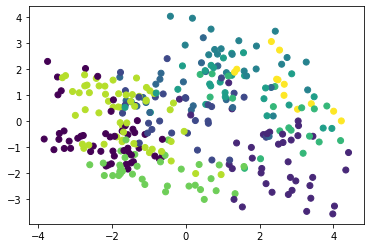

In [38]:
np.random.seed(410014)

# X is an np.array containing the data
kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
kmeansModel.fit(X)
labels = kmeansModel.labels_
from sklearn.decomposition import PCA
pca_2 = PCA(2)
# Standardize the X matrix to make PCA operate on correlations instead of covariances
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

plot_columns = pca_2.fit_transform(X_std)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

# Optional Task 2: Managerial considerations  for assessment and pursuit of segments. 
### Which segment(s), from among the classical segmentation segments, should we (Brand C) pursue? What kind of product should we offer to each segment we should pursue? Keep in mind that classical segmentation is more strategic and long-term. So, you should not make rigid assumptions about competitors and their offerings. This is in contrast with affinity segmentation,  which is a direct outcome of competitors and their offerings.  To decide which segment to pursue, companies consider the three buckets of factors listed on Slides 42 and 43. These three buckets of charactertics are collectively called the "Three Cs", or 3Cs. Suggested length of response: 2-4 pages.

# Optional Task 3 on using generative AI tools to produce code or persona descriptions: 
### This question applies only if you used generative AI in doing any of Part (A), Part (B), Optional Task 1 or Optional Task 2, in which case this question offers a way for you to document your generative-AI-interaction strategies and get extra credit.  If you did not use generative AI in doing any of thse questions then please ignore this optional task. For as many of the questions Part (A), Part (B), Optional Task 1 and Optional Task 2 above,  for which you attempted and used a generative AI tool to produce code or text responses, please submit the following: (A) The prompt or sequence of prompts that you entered into the generative tool, (B) an identification of which sequence of prompts was entered into which  generative tool (like ChatGPT, Bing Chat, Bard, GitHub Copilot), (C) generative tool's  output from each prompt, identifying which output corresponds to which prompt and which generative tool.

#### Part (A) (A) 
1. python change index column name
2. combine two tables directly row to row; recommended heatmap color theme to focus on large positives and negatives

#### Part (A) (B) 
ChatGPT
#### Part (A) (C)

In [ ]:
# 1

import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# List of new index names
new_index_names = ['Index1', 'Index2', 'Index3']

# Assigning new names to the index
df.index = new_index_names

In [ ]:
# 2
import pandas as pd

# Assuming you have two DataFrames: df1 and df2

# Concatenate the two DataFrames row-wise
combined_df = pd.concat([df1, df2], axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print(combined_df)

In [ ]:
# 2 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing your data

# Create a heatmap using Seaborn with a diverging color palette
sns.heatmap(data, cmap='coolwarm')

# Display the heatmap
plt.show()


#### Part (B) (A) 

1. extract kmeansModel label; count rows in each segment of a df

#### Part (B) (B) 
ChatGPT
#### Part (B) (C)

In [ ]:
# 1

from sklearn.cluster import KMeans

# Assuming you have fitted a KMeans model named 'kmeans_model' on your data

# Extract labels from the KMeans model
labels = kmeans_model.labels_

# Now you can use these labels for further analysis or visualization


In [ ]:
# 1

# Assuming 'labels' contains the cluster labels assigned by your clustering model

# Import pandas library
import pandas as pd

# Create a DataFrame with labels
df_labels = pd.DataFrame({'Cluster_Labels': labels})

# Count the number of rows in each segment
segment_counts = df_labels['Cluster_Labels'].value_counts()

# Display the counts
print(segment_counts)
